In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import time
import illustris_python_mod as il
import sys
import os
sys.path.append('../BH_dynamics_analysis')
sys.path.append('/home/pranavsatheesh/arepo_package/')
import arepo_package as arepo
from scipy.spatial import cKDTree
import BRAHMA_python as il_brahma
from tqdm import tqdm
import datetime
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

import scienceplots
plt.style.use('science')
sys.path.append('../py_files/')
import control_sample as control

In [2]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
basePath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/"
simName = basePath.split('/')[-2]

In [3]:
h = il.groupcat.loadHeader(basePath,0)['HubbleParam']

In [6]:
brahma_pop_Nstar10_bh1 = control.load_pop_file(basePath,pop_file_path,[0,0,10,1])

In [11]:
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/new/"
#pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
pop_file_1000 = pop_file_loc + "population_sort_gas-000_dm-000_star-1000_bh-000_w_rsep_cut_1bh.hdf5"
# pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"
pop_file_100 = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
#pop_100 = h5py.File(pop_file_100, 'r')
#pop_1000 = h5py.File(pop_file_1000, 'r')

TNG50_pop_Nstar100 = h5py.File(pop_file_100,'r')
TNG50_pop_Nstar1000 = h5py.File(pop_file_1000,'r')

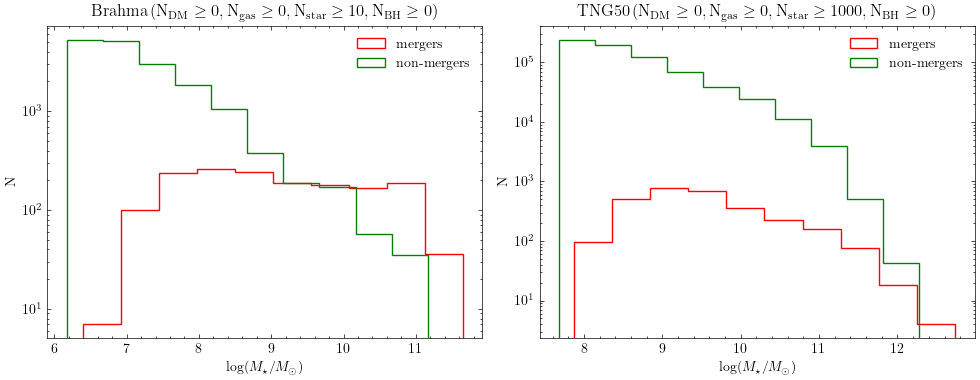

In [30]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 0)$')


axes[1].hist(np.log10(TNG50_pop_Nstar1000['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar1000['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 0)$')
fig.tight_layout()

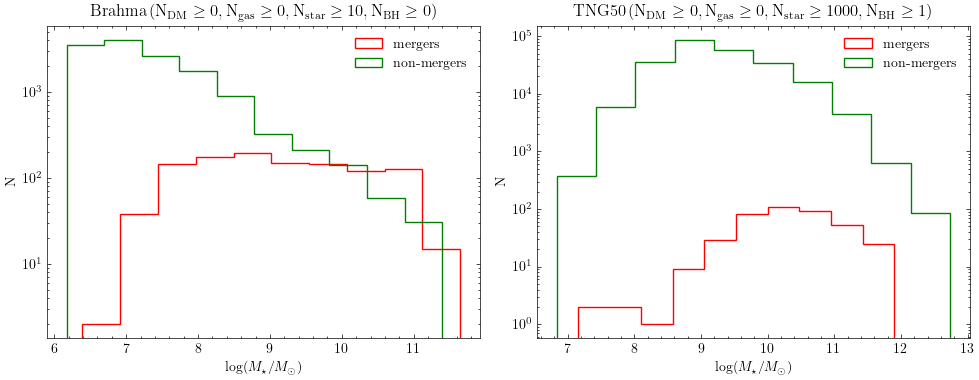

In [12]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10_bh1['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 0)$')

axes[1].hist(np.log10(TNG50_pop_Nstar100['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar100['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 1)$')
fig.tight_layout()

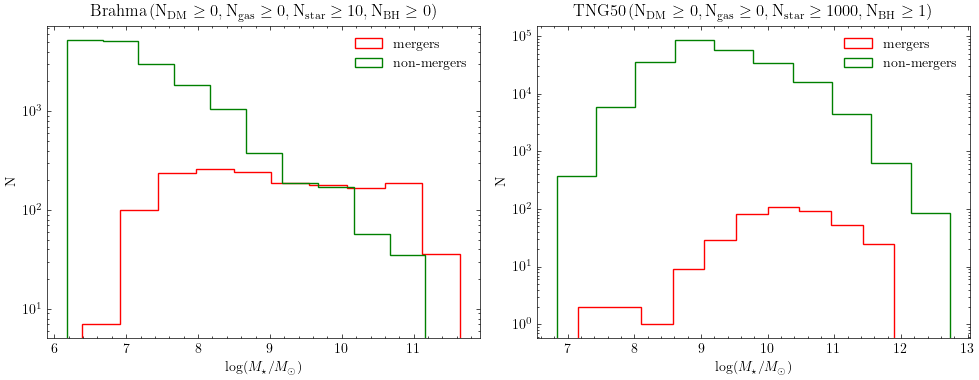

In [52]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 0)$')


axes[1].hist(np.log10(TNG50_pop_Nstar100['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar100['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 1)$')
fig.tight_layout()

In [53]:
merger_file_loc = '/home/pranavsatheesh/host_galaxies/data/merger_files/'
merger_prop = np.load(merger_file_loc + 'brahma_merger_file_output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3.npy',allow_pickle=True).item()

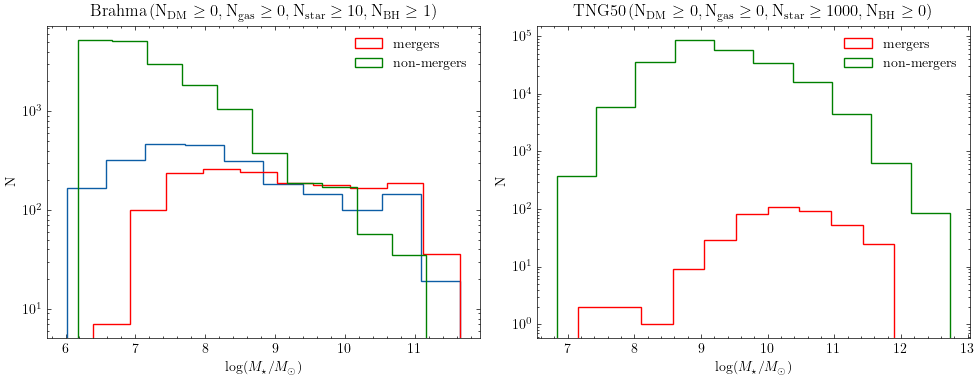

In [54]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

axes[0].hist(np.log10(merger_prop['remnant_SubhaloStellarMass'][merger_prop['remnant_SubhaloStellarMass']*1e10/h>=1e6]*1e10/h),histtype='step',bins=10)
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 1)$')


axes[1].hist(np.log10(TNG50_pop_Nstar100['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar100['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 0)$')
fig.tight_layout()

In [56]:
bh_braham_merger_key = merger_prop['remnant_SubhaloStellarMass']*1e10/h>=1e6

In [59]:
merger_prop['merger_type'][bh_braham_merger_key]

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
merger_prop.keys()

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])